![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 3: Image processing exercises

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-22)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/06_Image_processing.ipynb)

**Resources:**

* [SciPy](https://scipy.org)
* [Scipy Lectures](https://scipy-lectures.org)
* [NumPy](https://numpy.org)

# EXERCISE 1: image filtering [OBLIGATORY]

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg



In [2]:
import imageio
from scipy import misc
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import misc

In [3]:
from skimage import data 
from skimage.io import imsave
from skimage.data import astronaut
import matplotlib.pyplot as plt
from skimage import color


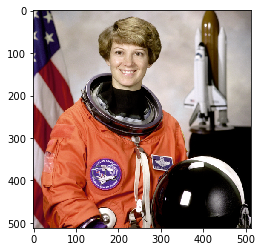

In [4]:
astro = data.astronaut()
imsave ('astronaut.rgb', astro)

plt.imshow(astro)
plt.show()

In [5]:
astro.shape

(512, 512, 3)

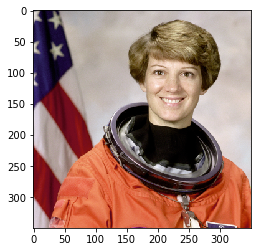

In [6]:
#Crop the image
import matplotlib.pyplot as plt

plt.imshow(astro[0:350, 0:350])
plt.show()

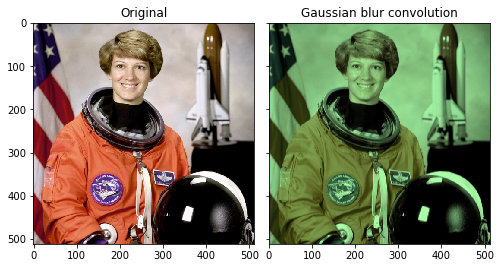

In [7]:
#Smoothen the image with a kernel filter.
import numpy as np



kernel = np.array([[[1/9,1/9,1/9]], 
                    [[1/9,1/9,1/9]], 
                   [[1/9,1/9,1/9]]]) 

filtered = ndimage.convolve(astro, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(7, 7))

ax[0].imshow(astro, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Gaussian blur convolution')

plt.tight_layout()
plt.show()

In [8]:
astro1 = misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(astro, sigma=3)
very_blurred = ndimage.gaussian_filter(astro, sigma=5)

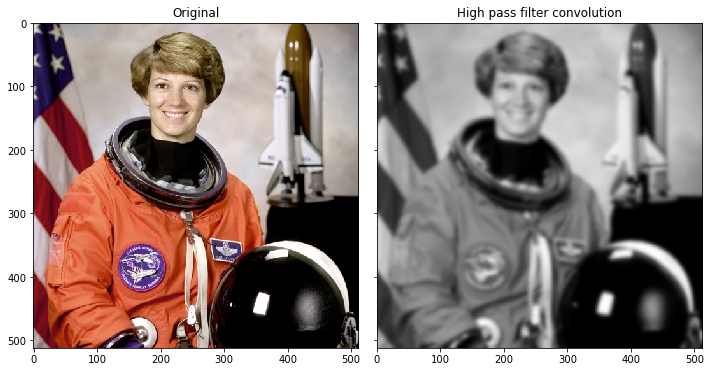

In [9]:
#Smoothen the image with a kernel filter.
from scipy import misc

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))
ax[0].imshow(astro, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(blurred_face, cmap=plt.cm.gray)
ax[1].set_title('High pass filter convolution')

plt.tight_layout()
plt.show()





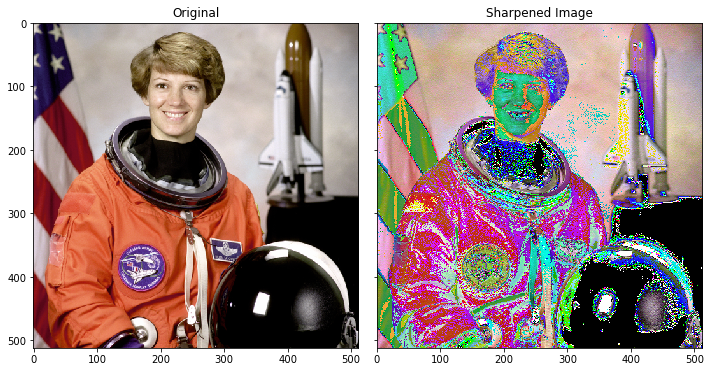

In [10]:
#Sharpen the image with a kernel filter
import numpy as np

kernel = np.array([[[0, -1, 0]], 
                    [[-1, 5, -1]], 
                    [[0, -1, 0]]])

filtered = ndimage.convolve(astro, kernel , mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(astro, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Sharpened Image')

plt.tight_layout()
plt.show()

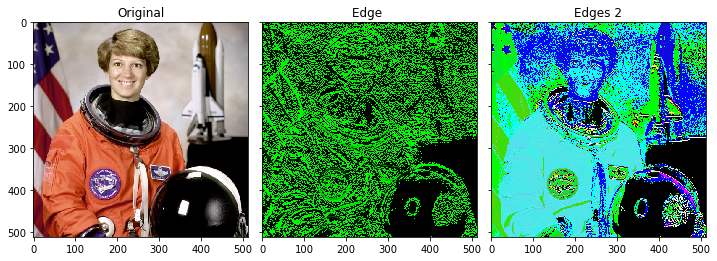

In [11]:
#Find the edges of the image with at least two different methods

import numpy as np

kernel = np.array([[[1, 0, -1]], 
                       [[0, 0, 0]], 
                        [[-1, 0, 1]]])

kernel1 = np.array([[[-1, -1, -1]], 
                       [[-1, 8, -1]], 
                        [[-1, -1, -1]]])/9

filtered = ndimage.convolve(astro, kernel , mode='mirror', cval=0.0)
filtered1 = ndimage.convolve(astro, kernel1 , mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(astro, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Edge ')

ax[2].imshow(filtered1, cmap=plt.cm.gray)
ax[2].set_title('Edges 2')



plt.tight_layout()
plt.show()

In [119]:
import scipy.misc
from scipy import misc


In [135]:
#save image as jpg (i think?)
from PIL import Image



kernel1 = np.array([[[1, 0, -1]], 
                       [[0, 0, 0]], 
                        [[-1, 0, 1]]])
filtered1 = ndimage.convolve(astro, kernel1 , mode='mirror', cval=0.0)


im = Image.fromarray(filtered1)
im.save("astro.jpg")


# EXERCISE 2: image segmentation [OBLIGATORY]

Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background).

* Load the image with scikit image
* Count the objects in the image using region based segmentation
* Try to fix the image using opening/closing algorithms



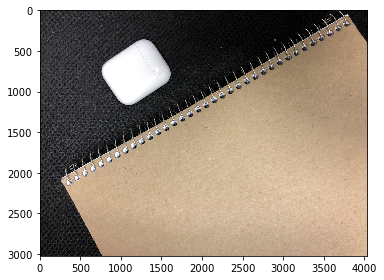

In [3]:
#Load the image with scikit image
from skimage.io import imread,imshow
from skimage import data
from skimage.exposure import histogram
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

#ale = rgb2gray(imread('/Users/alejandrabudar/Downloads/IMG_2144.jpg'));
ale = imread('/Users/alejandrabudar/Downloads/IMG_2144.jpg')
imshow(ale)


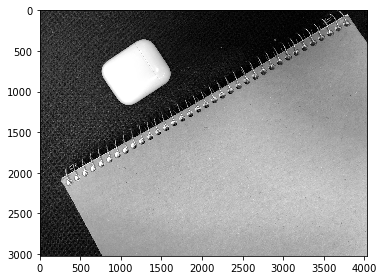

In [4]:
from skimage.io import imread,imshow
from skimage import data
from skimage.exposure import histogram
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

ale1 = rgb2gray(imread('/Users/alejandrabudar/Downloads/IMG_2144.jpg'));
#ale = imread('/Users/alejandrabudar/Downloads/IMG_2144.jpg')
imshow(ale1)

## Count the objects in the image using region based segmentation



In [74]:
label_objects, nb_labels = ndi.label(ale1)
print(nb_labels)


40


## Try to fix the image using opening/closing algorithms

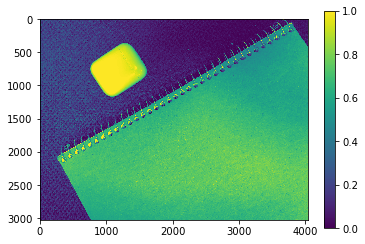

In [10]:
import matplotlib.pyplot as plt

plt.imshow(ale1)
ale2= plt.colorbar()
plt.show()

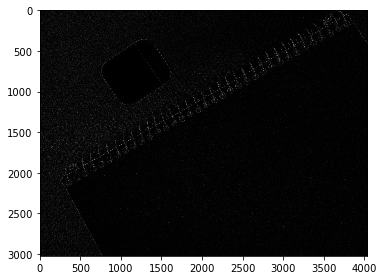

In [11]:
from skimage import data
from skimage.feature import canny
from skimage.filters import sobel

sobel_ale = sobel(ale1)

imshow(sobel_ale, cmap=plt.cm.gray)

plt.tight_layout()
plt.show()

//anaconda3/envs/bts36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


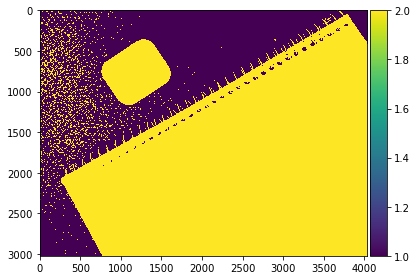

In [15]:
from skimage.morphology import watershed

segmentation = watershed(sobel_ale, colors)
imshow(segmentation)

6980


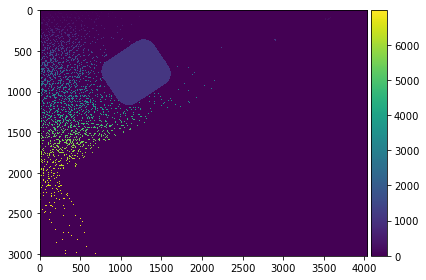

In [34]:
label_objects, nb_labels = ndi.label(fill_pic)
print(nb_labels)
imshow(label_objects)

452


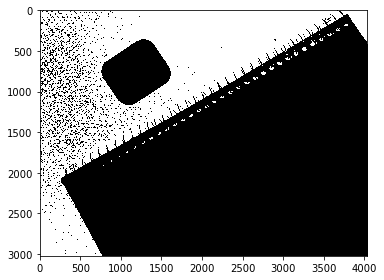

In [76]:
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0

coins_cleaned = mask_sizes[segmentation]

imshow(coins_cleaned)

label_objects, nb_labels = ndi.label(coins_cleaned)
print(nb_labels)



1


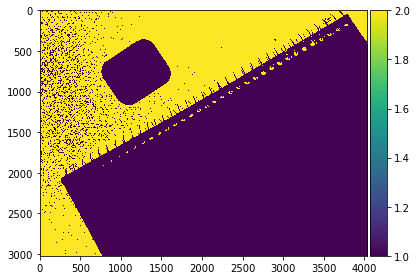

In [77]:
colors = np.zeros_like(ale1)


colors[coins_cleaned < 0.2] = 1

colors[coins_cleaned > 0.3] = 2
imshow(colors)

label_objects, nb_labels = ndi.label(colors)
print(nb_labels)

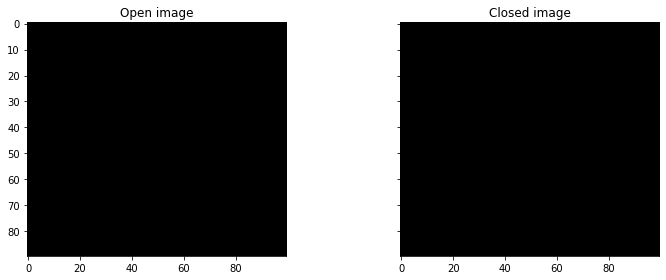

In [79]:
# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(11, 4))

ax[0].imshow(open_img[10:100, 100:200], cmap=plt.cm.gray)
ax[0].set_title('Open image')

ax[1].imshow(close_img[10:100, 100:200], cmap=plt.cm.gray)
ax[1].set_title('Closed image')



plt.tight_layout()
plt.show()